### Teoria do Portfolio de Markowitz - Obtendo a Fronteira Eficiente

In [2]:
# Carregando as Bibliotecas necessárias:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Carregando dados da API Yahoo Finance:
assets = ['PG','^GSPC']
pf_data = pd.DataFrame()
for a in assets:
    pf_data[a] = wb.DataReader(a, data_source='yahoo', start='2010-1-1')['Adj Close']

pf_data.tail()

,PG,^GSPC
Date,,
2022-09-13,138.179993,3932.689941
2022-09-14,138.509995,3946.010010
2022-09-15,137.440002,3901.350098
2022-09-16,138.279999,3873.330078
2022-09-19,137.910004,3870.209961


In [4]:
# Normalizando os dados na base 100:
norm = pf_data / pf_data.iloc[0] * 100

<AxesSubplot:xlabel='Date'>

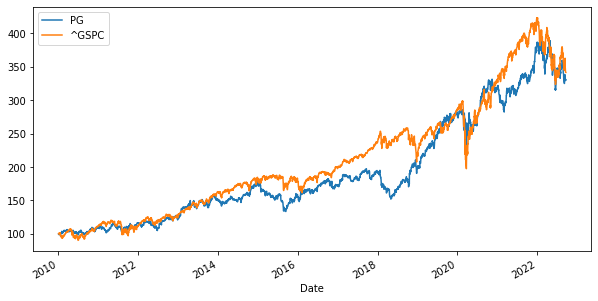

In [5]:
# Gerando um gráfico dos dados normalizados:
norm.plot(figsize=(10,5))

Analisando os Retornos:

In [6]:
# Gerando os retornos logartmicos diarios:
log_returns = np.log(pf_data / pf_data.shift(1))
log_returns.tail()

,PG,^GSPC
Date,,
2022-09-13,-0.020912,-0.044199
2022-09-14,0.002385,0.003381
2022-09-15,-0.007755,-0.011382
2022-09-16,0.006093,-0.007208
2022-09-19,-0.002679,-0.000806


<AxesSubplot:xlabel='Date'>

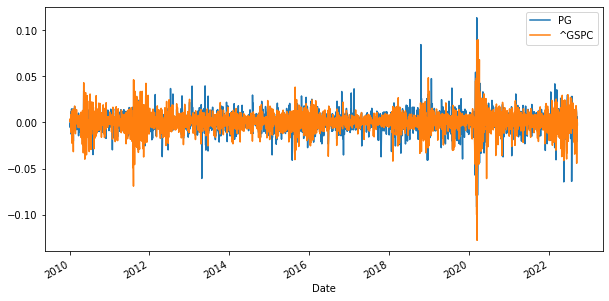

In [8]:
log_returns.plot(figsize=(10,5))

In [9]:
# Gerando os retornos médios anuais:
annual_returns = log_returns.mean() * 250
annual_returns

PG       0.093411
^GSPC    0.096003
dtype: float64

In [10]:
# Gerando a Covariância Anualizada:
annual_cov = log_returns.cov() * 250
annual_cov

,PG,^GSPC
PG,0.029930,0.017334
^GSPC,0.017334,0.031023


In [12]:
# Gerando a Matriz de Correlação:
corr_matrix = log_returns.corr()
corr_matrix

,PG,^GSPC
PG,1.000000,0.568845
^GSPC,0.568845,1.000000


Gerando os Pesos:

In [13]:
# Criar uma variável que vai contar os ativos de uma carteira:
num_assets = len(assets)
num_assets

2

In [18]:
# Gerando um array com pesos aleatórios para os ativos que somem 1:
weights = np.random.random(num_assets) # gera os pesos iniciais
weights /= np.sum(weights) # reatribui os pesos divididos pela soma dos pesos iniciais
weights # mostras os pesos

array([0.39337467, 0.60662533])

In [19]:
np.sum(weights) # mostra a soma dos pesos gerados

1.0

Medindo Retorno, Variância e Volatilidade da Carteira:

In [20]:
# Calculando o Retorno Esperado do Portfolio:
exp_return = np.sum(weights * log_returns.mean()) * 250
exp_return

0.09498323413590834

In [21]:
# Calculando a Variância Esperada do Portfolio:
exp_var = np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))
exp_var

0.024320670642165983

In [22]:
# Calculando a Volatilidade Esperada do Portfolio:
exp_vol = np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights)))
exp_vol

0.1559508597031962

Simulando 1000 Carteiras combinando os ativos:

In [26]:
# Simula 1000 combinações de ativos e coleta os Retornos e os Riscos de cada Combinação:

port_returns = []
port_volatilities = []

for x in range(1000):
    weights = np.random.random(num_assets) # gera um numero aleatorio para cada asset
    weights /= np.sum(weights) # reatribui pesos aleatorios que somam 1
    port_returns.append(np.sum(weights * log_returns.mean()) * 250) # coleta os retornos das carteiras simuladas
    port_volatilities.append(np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights)))) # coleta as volatilidades das carteiras simuladas
    
port_returns, port_volatilities

([0.09449330339529391,
  0.09488982084452698,
  0.09496850729028562,
  0.09385189545382826,
  0.09440656934558712,
  0.09565832759932816,
  0.09421993669613964,
  0.093956748583442,
  0.09341305471388699,
  0.09381455757056162,
  0.09431532197035791,
  0.09473083509589306,
  0.09440822677460146,
  0.09509454653154094,
  0.09364562324114867,
  0.09561032102163168,
  0.09515333713222887,
  0.09508645732136345,
  0.09478714185293446,
  0.0943234039945687,
  0.09477052053126071,
  0.09413214155933776,
  0.09497040446981861,
  0.09456552260271245,
  0.09418766298337033,
  0.09394687029374779,
  0.09503400359790444,
  0.09576805230752111,
  0.0956914891584937,
  0.09566286986869116,
  0.09585730480312214,
  0.09477010181525403,
  0.0948036946412539,
  0.09452527226501252,
  0.09442637814957379,
  0.09452377389410968,
  0.09495884322726827,
  0.09341716442480949,
  0.09441019614136906,
  0.09495654607104682,
  0.09503431623676402,
  0.09347192818258489,
  0.09471748966388685,
  0.095655451039

In [27]:
# Simula 1000 combinações de ativos, coleta os Retornos e os Riscos de cada Combinação e os atribui a objetos array do numpy:

port_returns = []
port_volatilities = []

for x in range(1000):
    weights = np.random.random(num_assets) # gera um numero aleatorio para cada asset
    weights /= np.sum(weights) # reatribui pesos aleatorios que somam 1
    port_returns.append(np.sum(weights * log_returns.mean()) * 250) # coleta os retornos das carteiras simuladas
    port_volatilities.append(np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights)))) # coleta as volatilidades das carteiras simuladas
    
port_returns = np.array(port_returns) # cria o array dos retornos
port_volatilities = np.array(port_volatilities) # cria o array das volatilidades

port_returns, port_volatilities

(array([0.09480294, 0.09557811, 0.09378367, 0.09393957, 0.09520737,
        0.09430381, 0.09361184, 0.09429526, 0.09556143, 0.09362472,
        0.09341191, 0.09404809, 0.09376446, 0.09490059, 0.09428315,
        0.09523721, 0.09513136, 0.09458888, 0.09502045, 0.09450432,
        0.09441884, 0.09505124, 0.09571988, 0.09536276, 0.09417368,
        0.09595384, 0.0939792 , 0.09531709, 0.09467722, 0.09376734,
        0.09570125, 0.09480536, 0.09467045, 0.09572352, 0.0952    ,
        0.09434141, 0.09531505, 0.09579119, 0.09438608, 0.09485249,
        0.0947233 , 0.09547205, 0.09372377, 0.09524494, 0.09539688,
        0.09502159, 0.09494198, 0.0949076 , 0.09510774, 0.09409053,
        0.0952766 , 0.0936621 , 0.09482204, 0.0955834 , 0.09484072,
        0.09506274, 0.09402882, 0.0955307 , 0.09527121, 0.09430304,
        0.09443277, 0.09426199, 0.09467649, 0.09489512, 0.09459141,
        0.09498579, 0.09392971, 0.09404343, 0.09376409, 0.0941927 ,
        0.09596917, 0.09438266, 0.09466048, 0.09

Plotar um Gráfico com a Fronteira Eficiente:

In [28]:
#Criar um DataFrame com os Retornos e as Volatilidades das Carteiras Simuladas:
portfolios = pd.DataFrame({'Return':port_returns, 'Volatility':port_volatilities})

In [29]:
portfolios.head()

,Return,Volatility
0,0.094803,0.154861
1,0.095578,0.165057
2,0.093784,0.163868
3,0.093940,0.160894
4,0.095207,0.158420


In [30]:
portfolios.tail()

,Return,Volatility
995,0.093977,0.160261
996,0.094668,0.154579
997,0.094106,0.158327
998,0.095663,0.167000
999,0.094081,0.158664


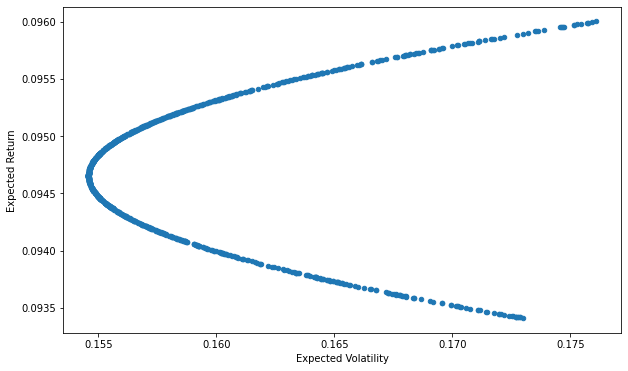

In [31]:
# Plotando o Gráfico da Fronteira Eficiente:
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10,6))
# portfolios - dataframe a ser plotado
# x='Volatility' - dados do eixo x
# y='Return' - dados do eixo y
# kind='scatter' - tipo do gráfico (dispersão)
# figsize=(10,6) - tamanho da visualização do gráfico
plt.xlabel('Expected Volatility') # titulo do eixo x
plt.ylabel('Expected Return') # titulo do eixo y
plt.show() # execução do gráfico